# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
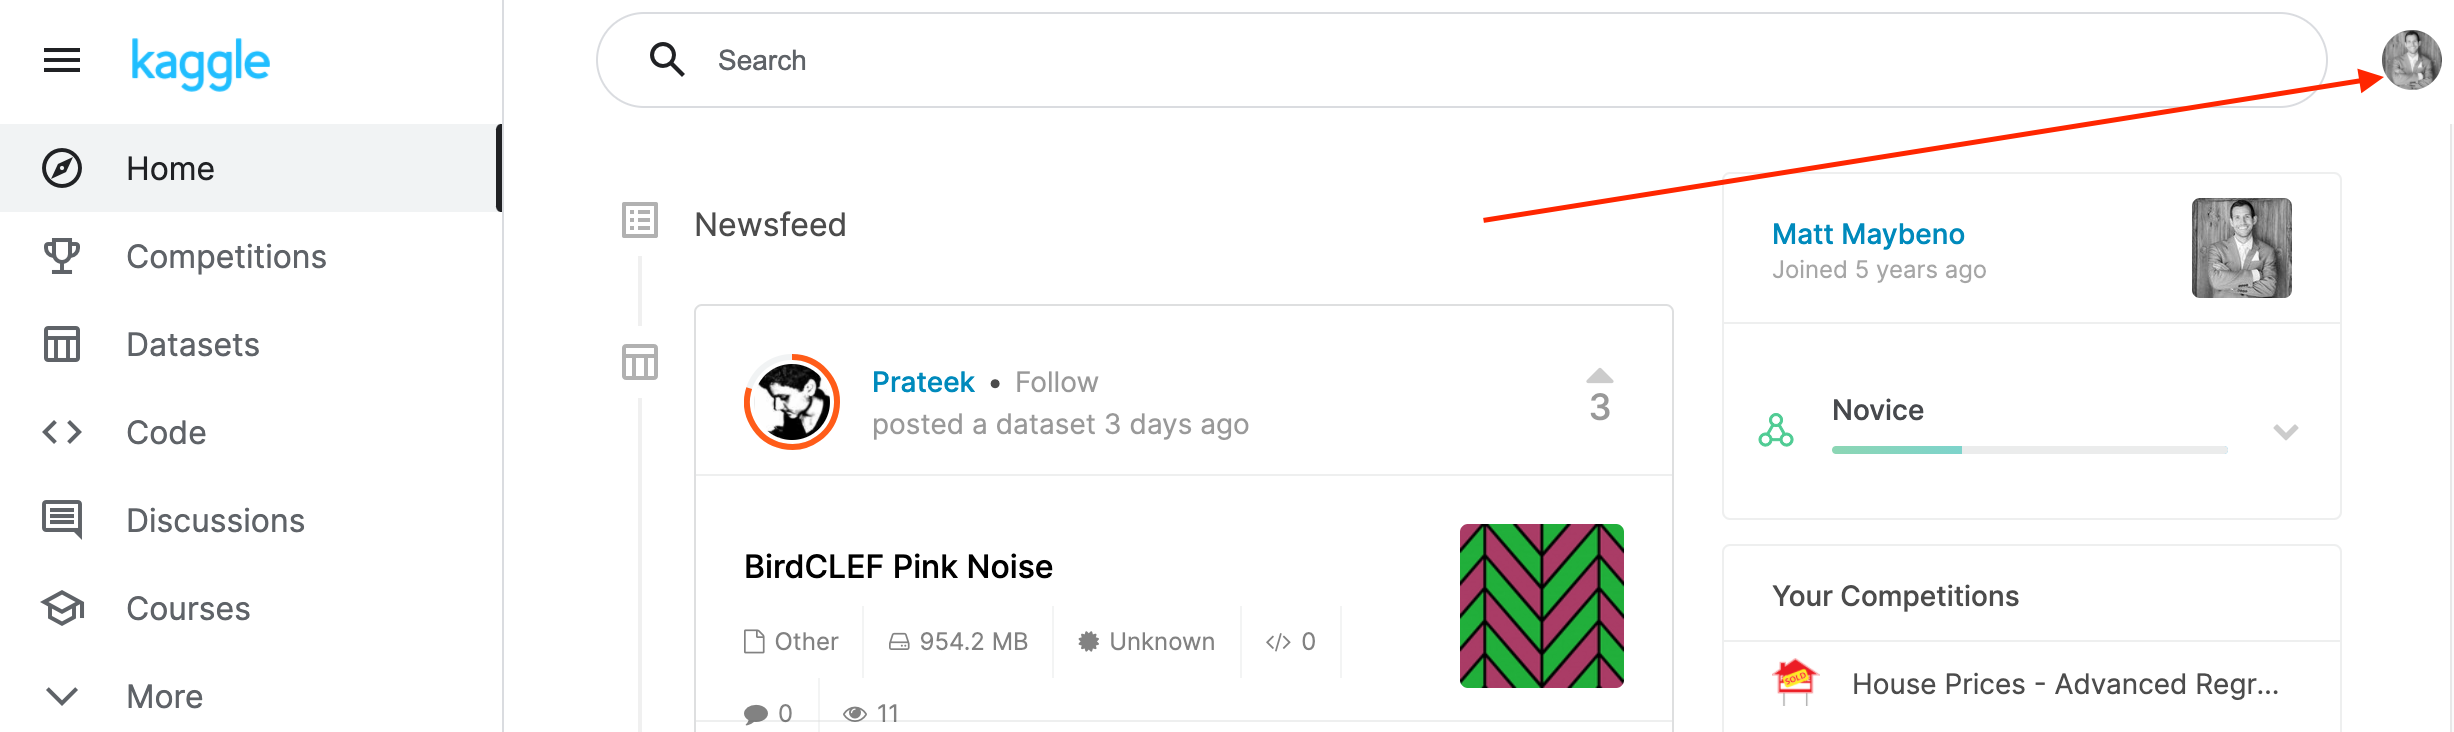
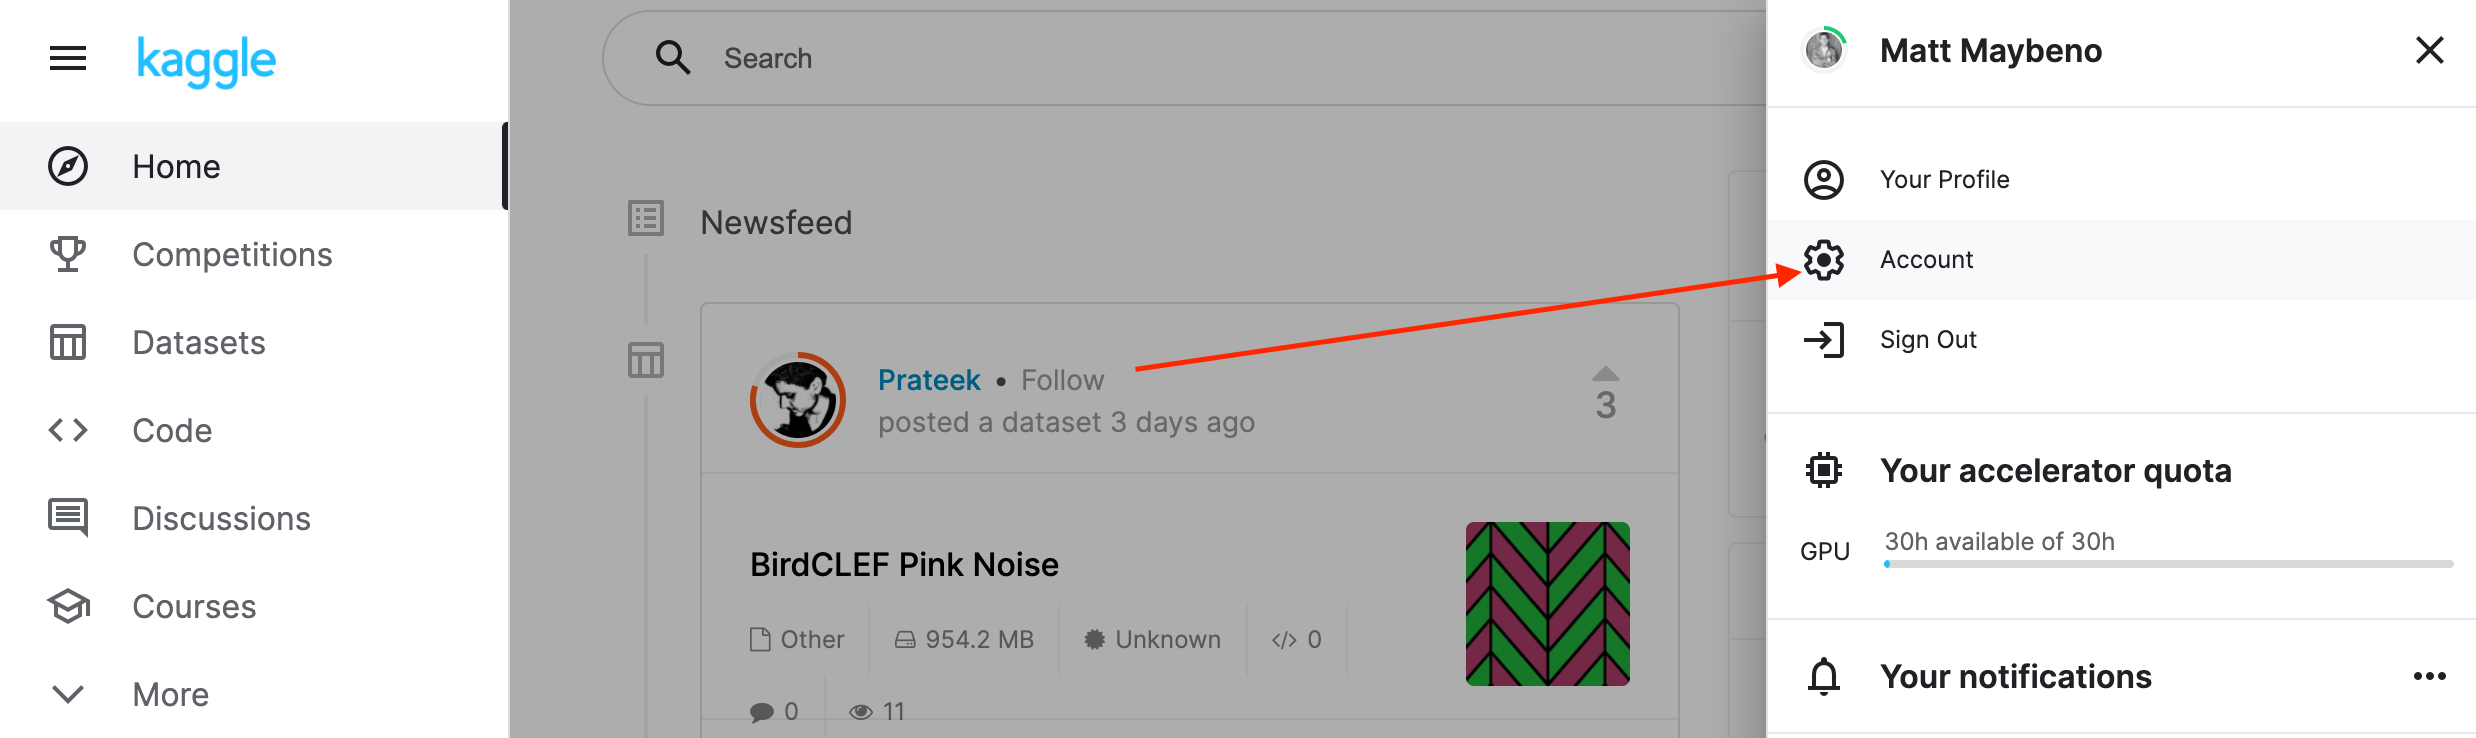
2. Scroll down to API and click Create New API Token.
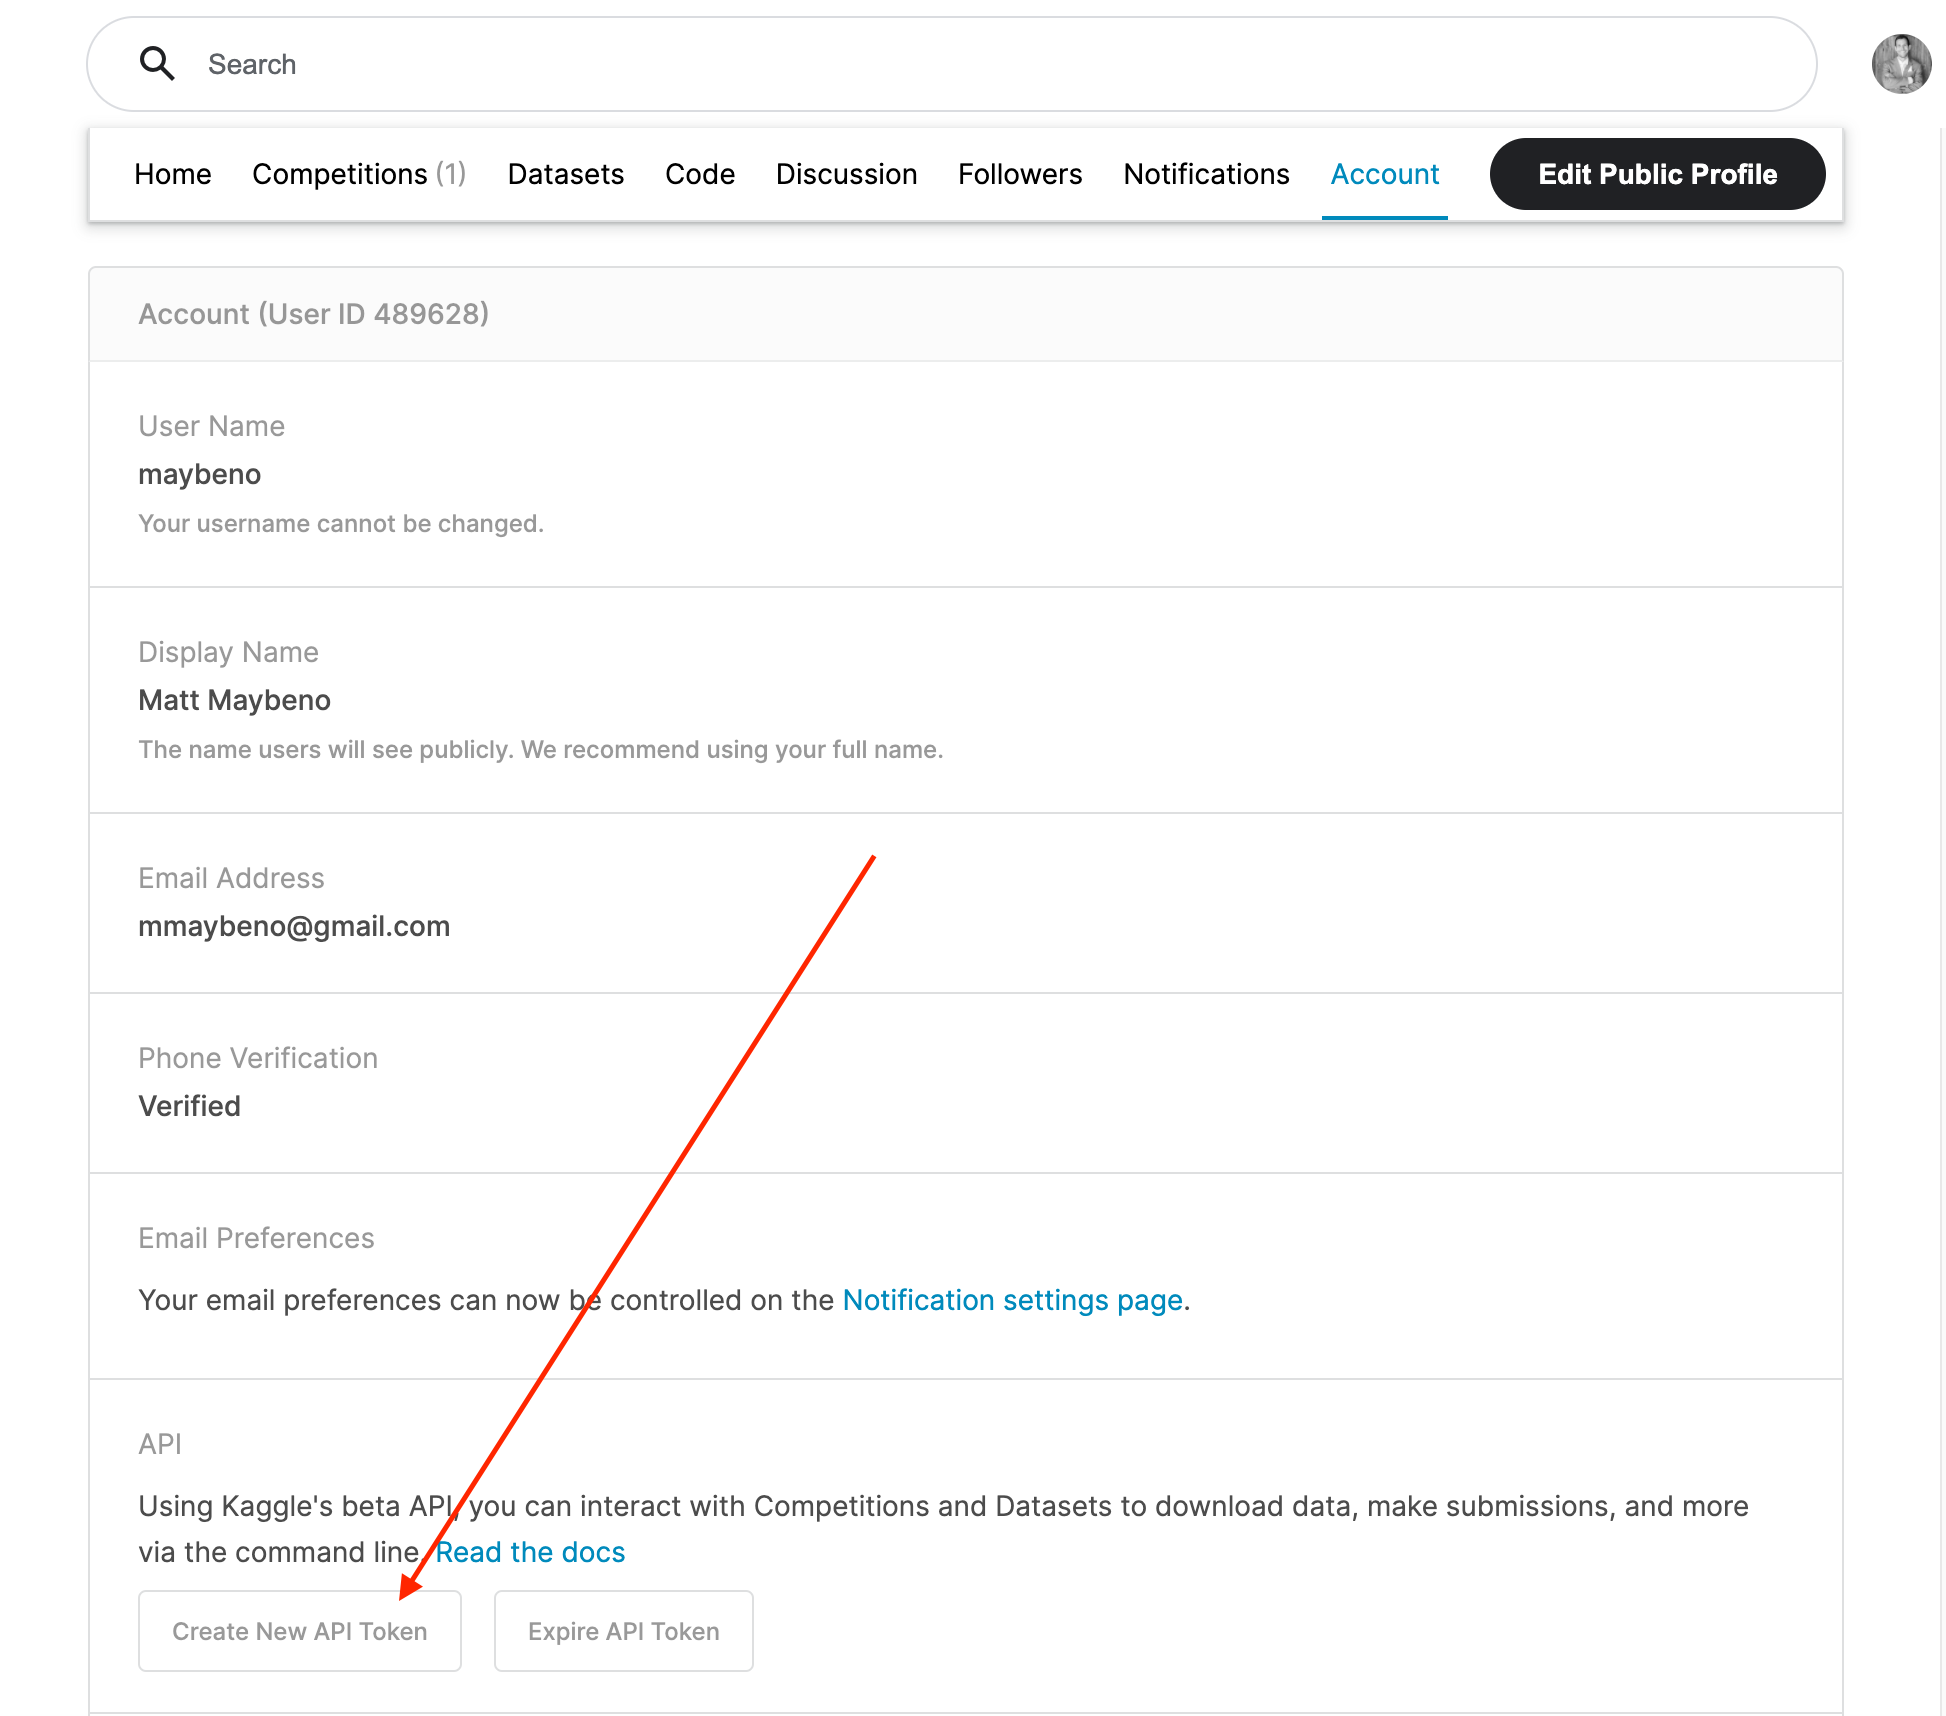
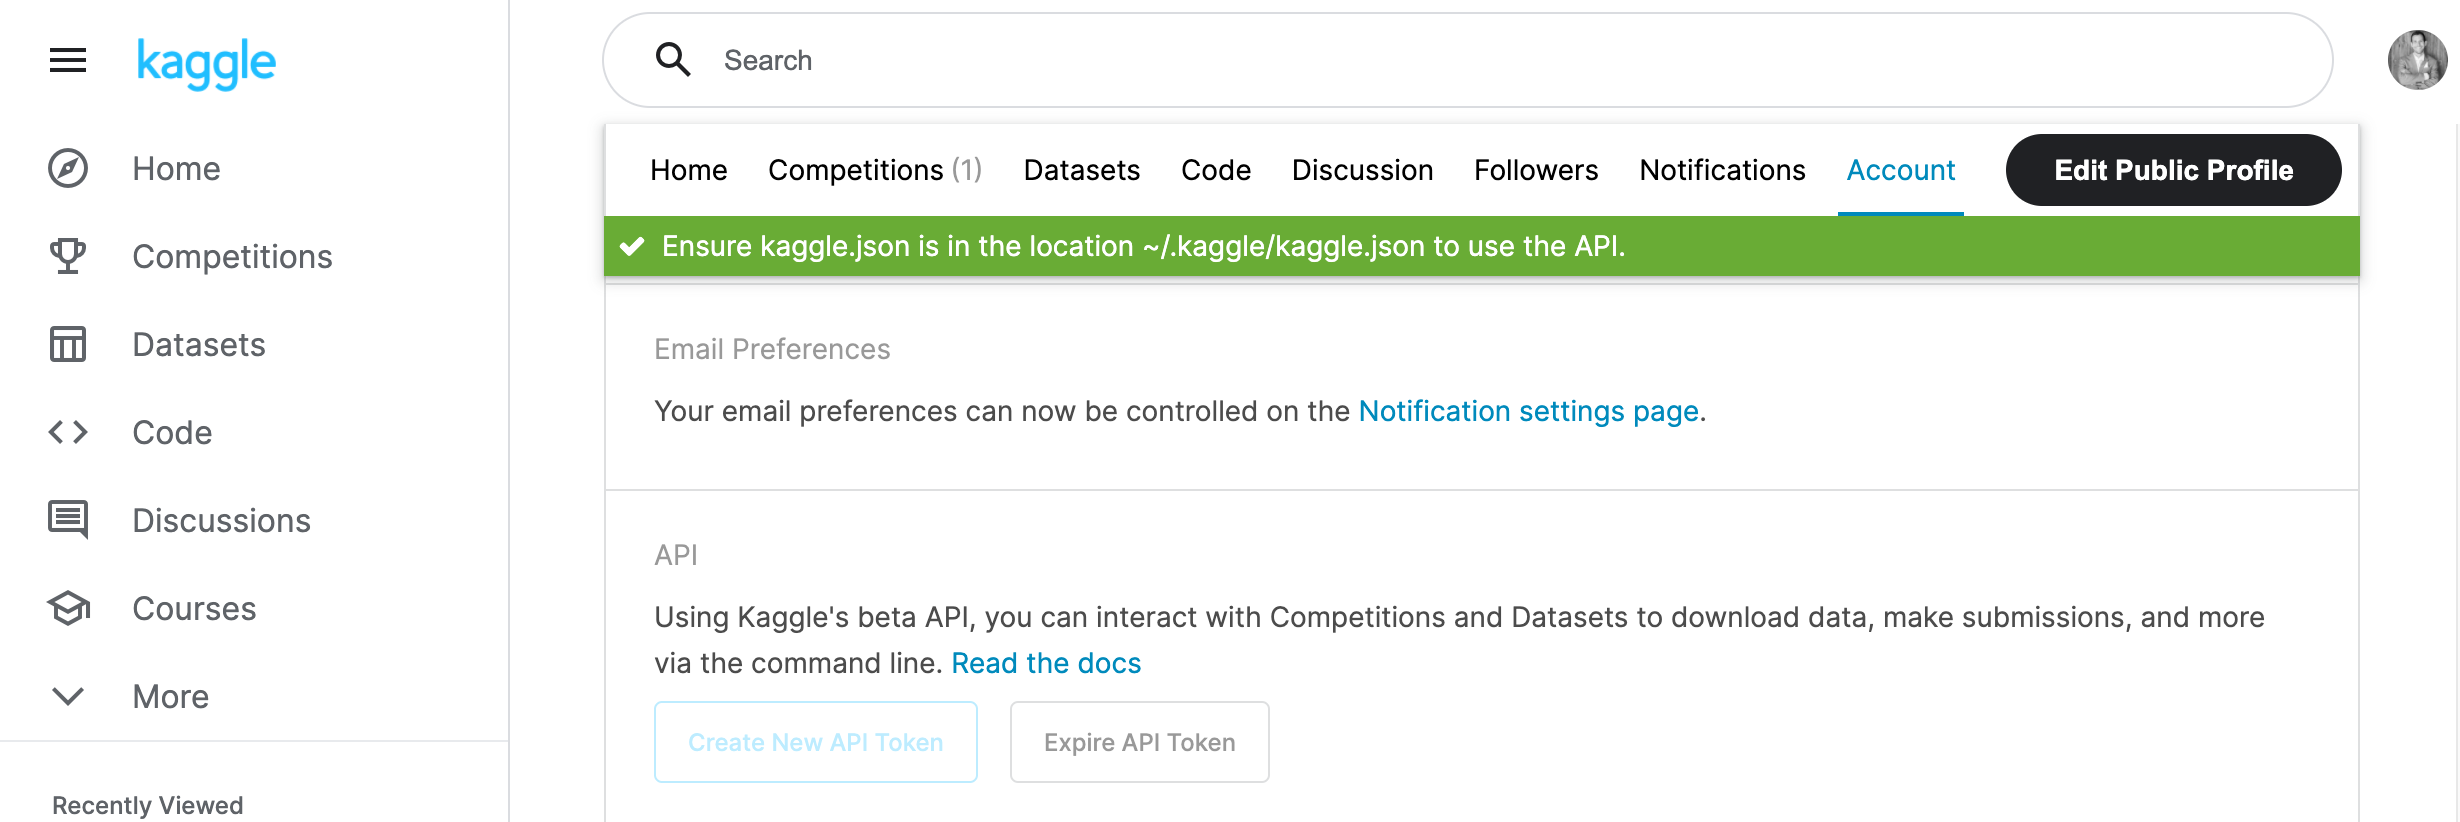
3. Open up `kaggle.json` and use the username and key.
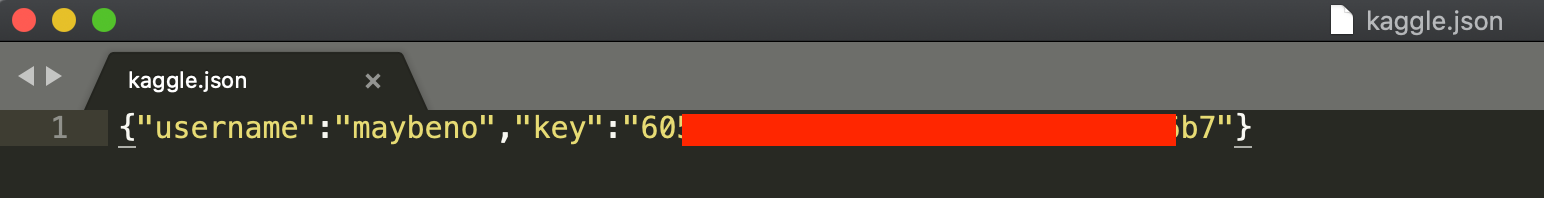

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
#!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install -U "mxnet<2.0.0" bokeh
!pip install autogluon --no-cache-dir
!pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 158.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 150.9 MB/s  0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [bokeh]32m3/4 [bokeh]
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 115.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 126.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 136.1 MB/s  0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19208 sha256=1f16

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root’: Permission denied
touch: cannot touch '/root/.kaggle/kaggle.json': Permission denied
chmod: cannot access '/root/.kaggle/kaggle.json': Permission denied


In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
import os
kaggle_username = "cjmunoz131"
kaggle_key = ""

# Save API token the kaggle.json file
#with open("/root/.kaggle/kaggle.json", "w") as f:
path = os.path.expanduser("root/.kaggle/kaggle.json")
os.makedirs(os.path.dirname(path), exist_ok=True)
with open(path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
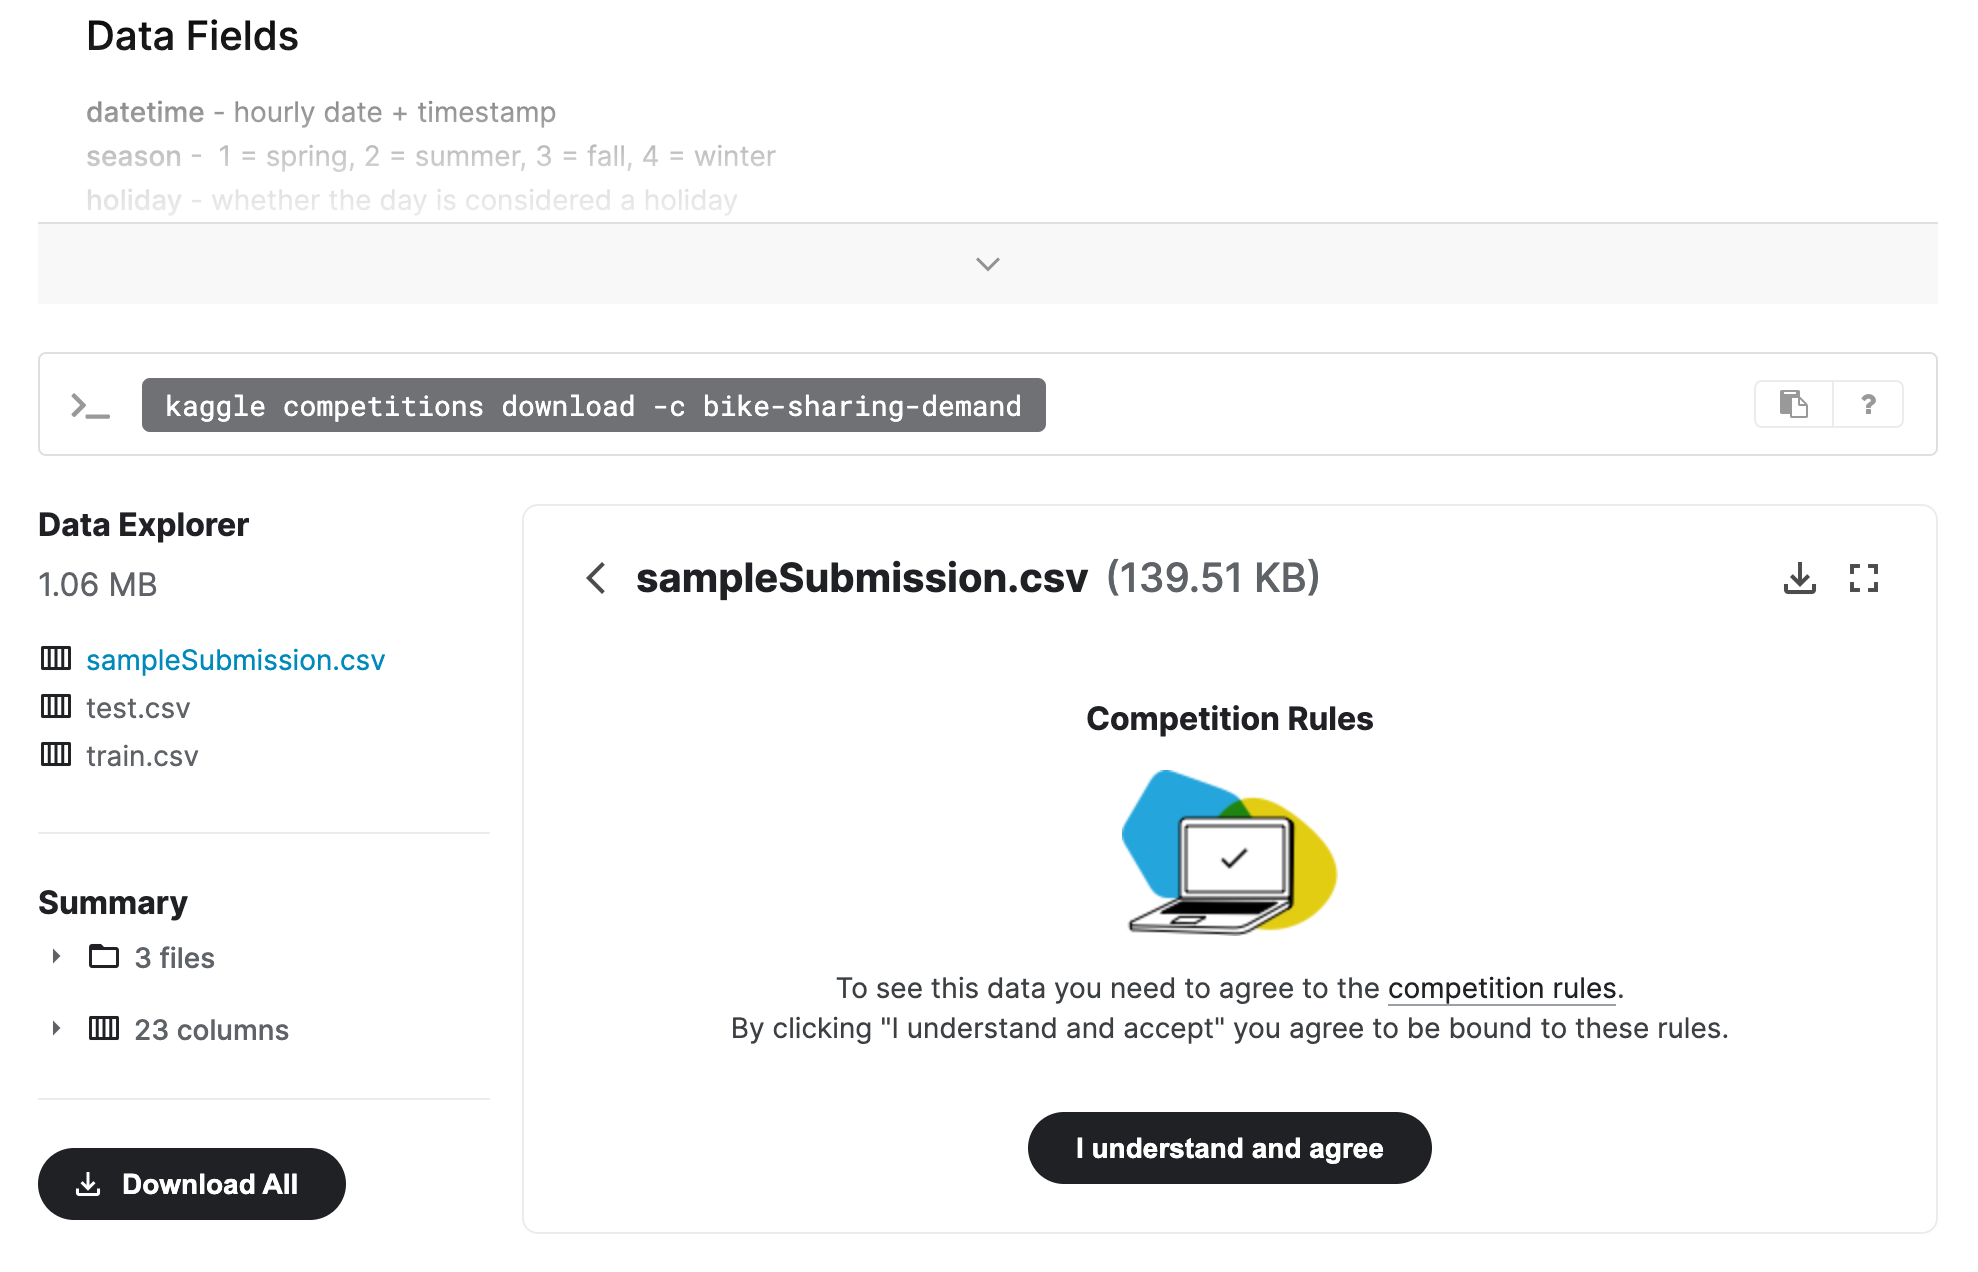

In [4]:
import os
import json

kaggle_path = os.path.expanduser("~/.kaggle/kaggle.json")

with open(kaggle_path, "r") as f:
    kaggle_creds = json.load(f)

api_key = kaggle_creds["key"]
os.environ["KAGGLE_API_TOKEN"] = api_key

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 18.4MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("./train.csv", sep =",")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/variation of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
train["season"].unique()

array([1, 2, 3, 4])

In [10]:
train["holiday"].unique()

array([0, 1])

In [11]:
train.shape

(10886, 12)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
train = pd.read_csv("./train.csv", sep =",", parse_dates=["datetime"], date_format="%Y-%m-%d %H:%M:%S")

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("./test.csv", sep = ",", parse_dates=["datetime"], date_format="%Y-%m-%d %H:%M:%S")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [17]:
# Same thing as train and test dataset
submission = pd.read_csv("./sampleSubmission.csv", sep=",", parse_dates=["datetime"], date_format="%Y-%m-%d %H:%M:%S")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [18]:
target = "count"
drop_cols = ["casual", "registered"]
evaluation_metric = "root_mean_squared_error"
time_limit = 600
presets= "best_quality"

In [19]:
train_cleansed = train.drop(columns=drop_cols)

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [45]:
predictor = TabularPredictor(label=target,
                             problem_type="regression",eval_metric="rmse").fit(train_data=train_cleansed, time_limit=time_limit, presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20251226_200440"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Mon Dec  1 05:36:50 UTC 2025
CPU Count:          2
Memory Avail:       3.48 GB / 7.64 GB (45.5%)
Disk Space Avail:   18.50 GB / 19.94 GB (92.8%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

### Review AutoGluon's training run with ranking of models that did the best.

In [46]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.485837  root_mean_squared_error      23.270765  393.337414                0.001385           0.061998            3       True         11
1          CatBoost_BAG_L2 -114.906579  root_mean_squared_error      21.669619  295.670662                0.107645          33.467357            2       True         10
2          LightGBM_BAG_L2 -115.280479  root_mean_squared_error      21.641188  288.841393                0.079214          26.638088            2       True          8
3        LightGBMXT_BAG_L2 -115.334872  root_mean_squared_error      22.057306  291.027801                0.495332          28.824496            2       True          7
4   RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error       0.722292   17.138131   

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.84522968959655,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_L2': -116.54835939455667,
  'LightGBMXT_BAG_L2': -115.33487218029242,
  'LightGBM_BAG_L2': -115.28047904091513,
  'RandomForestMSE_BAG_L2': -116.77742

### Create predictions from test dataset

In [63]:
predictions = predictor.predict(test)
predictions.head()

0    87.324532
1    89.400269
2    89.401154
3    94.359596
4    94.360878
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [64]:
# Describe the `predictions` series to see if there are any negative values
predictions[predictions<0]

Series([], Name: count, dtype: float32)

In [71]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [67]:
# Set them to zero
predictions[predictions<0] = 0

In [72]:
predictions.head()

0    87.324532
1    89.400269
2    89.401154
3    94.359596
4    94.360878
Name: count, dtype: float32

### Set predictions to submission dataframe, save, and submit

In [73]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 144kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [76]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/bin/kaggle", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/lib/python3.11/site-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 1467, in competition_submissions_cli
    submissions = self.competition_submissions(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: KaggleApi.competition_submissions() got an unexpected keyword argument 'page_number'


#### Initial score of `1.4457`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

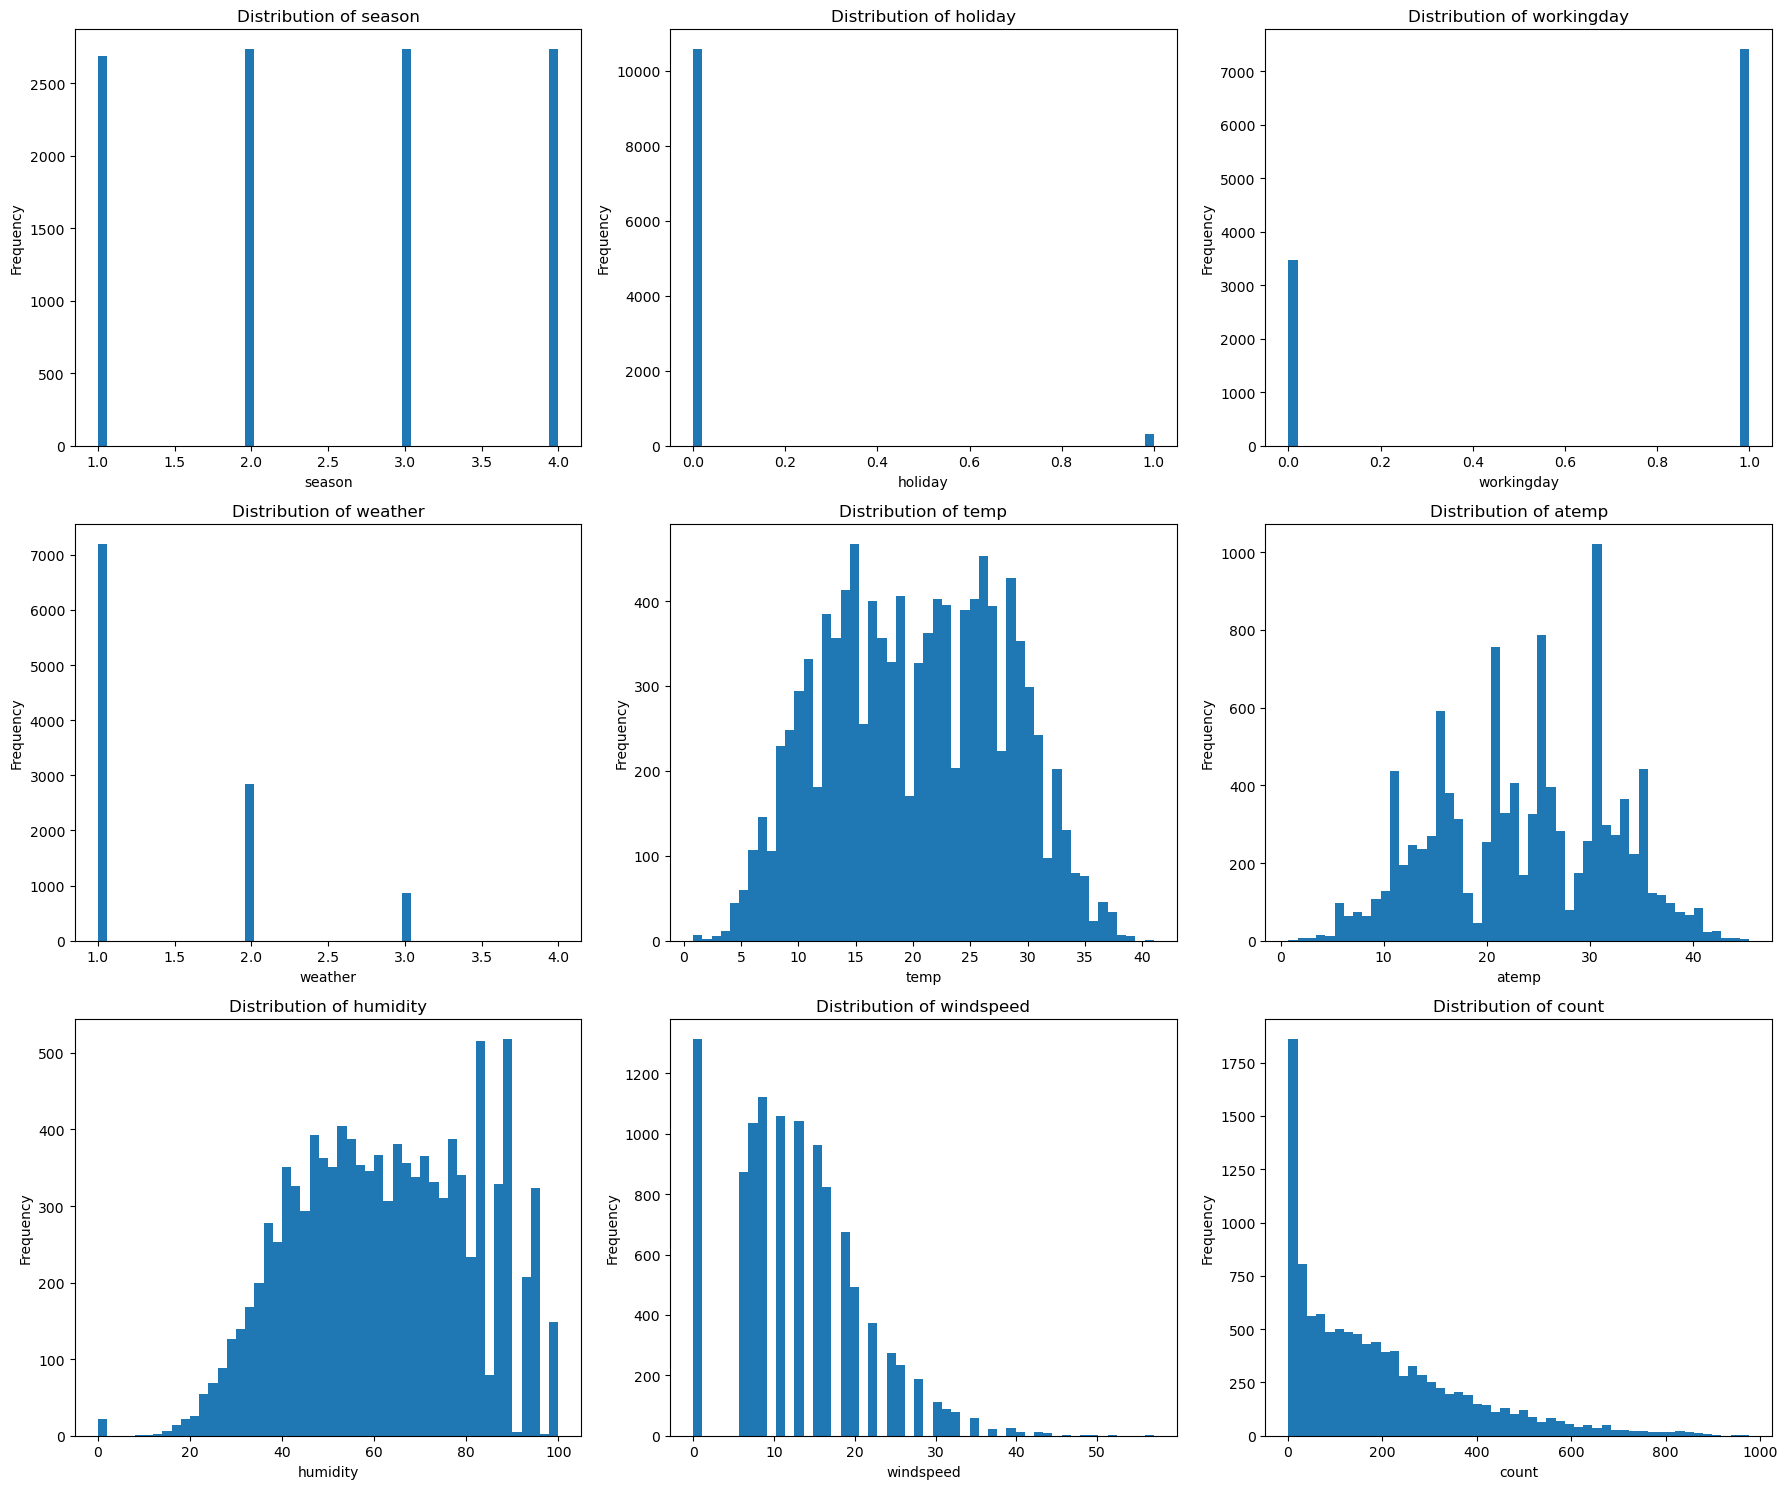

In [20]:
import matplotlib.pyplot as plt
import math

# Select only numerical features
num_cols = train_cleansed.select_dtypes(include="number").columns

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histogram for each numerical feature
for ax, col in zip(axes, num_cols):
    ax.hist(train_cleansed[col], bins=50)
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

# Remove empty subplots
for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [47]:
def add_datetime_features(df):
    df = df.copy()
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["weekday"] = df["datetime"].dt.weekday
    return df

In [48]:
# create a new feature
train_columns_derived = add_datetime_features(train_cleansed)
test_columns_derived = add_datetime_features(test)

In [81]:
#train_columns_derived_df = train_columns_derived.drop(["datetime"])
#test_columns_derived_df = test_columns_derived.drop(["datetime"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int32         
 10  month       6493 non-null   int32         
 11  day         6493 non-null   int32         
 12  hour        6493 non-null   int32         
 13  weekday     6493 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(5)
memory usage: 583.5 KB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [49]:
train_columns_derived["season"] = train_columns_derived["season"].astype("category")
train_columns_derived["weather"] = train_columns_derived["weather"].astype("category")
test_columns_derived["season"] = test_columns_derived["season"].astype("category")
test_columns_derived["weather"] = test_columns_derived["weather"].astype("category")

In [50]:
train_columns_derived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int32         
 12  day         10886 non-null  int32         
 13  hour        10886 non-null  int32         
 14  weekday     10886 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(3), int32(5), int64(4)
memo

In [51]:
test_columns_derived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int32         
 10  month       6493 non-null   int32         
 11  day         6493 non-null   int32         
 12  hour        6493 non-null   int32         
 13  weekday     6493 non-null   int32         
dtypes: category(2), datetime64[ns](1), float64(3), int32(5), int64(3)
memory usage: 495.1 KB


In [52]:
# View are new feature
train_columns_derived.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


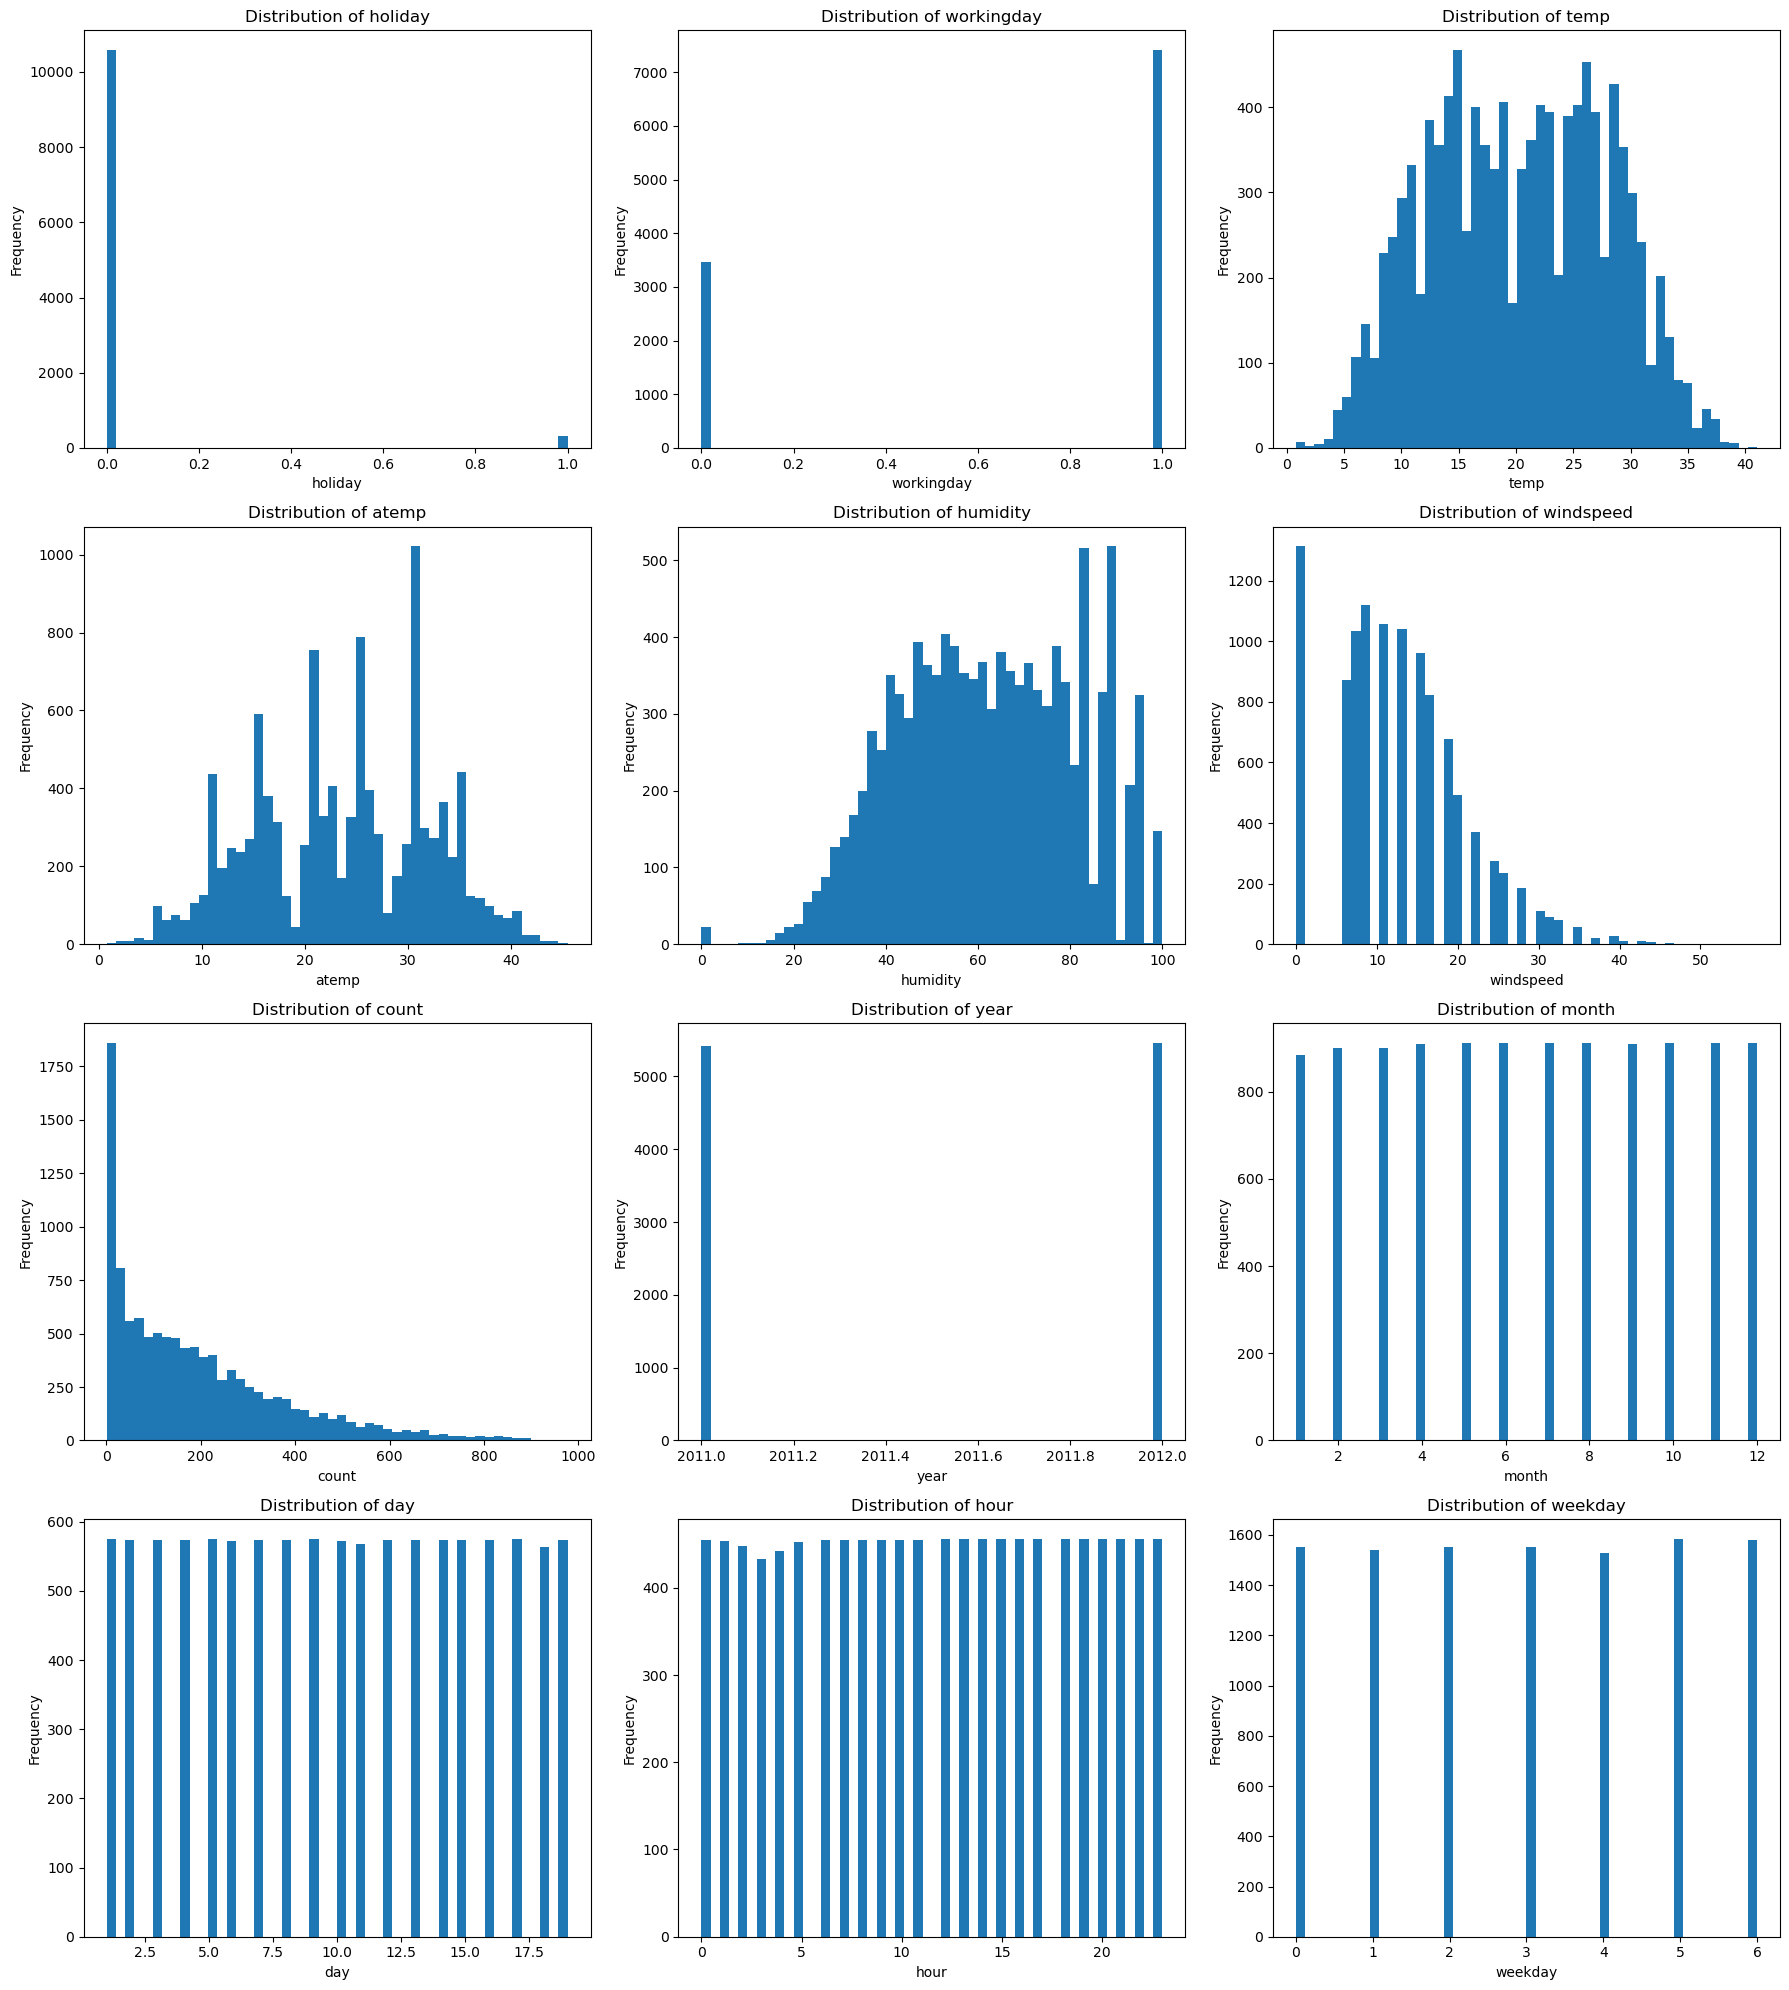

In [53]:
# View histogram of all features again now with the hour feature
import matplotlib.pyplot as plt
import math

# Select only numerical features
num_cols = train_columns_derived.select_dtypes(include="number").columns

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histogram for each numerical feature
for ax, col in zip(axes, num_cols):
    ax.hist(train_columns_derived[col], bins=50)
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

# Remove empty subplots
for ax in axes[len(num_cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [54]:
predictor_new_features = TabularPredictor(label=target,
                             problem_type="regression",eval_metric="rmse").fit(train_data=train_columns_derived, time_limit=time_limit, presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20251226_201735"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Mon Dec  1 05:36:50 UTC 2025
CPU Count:          2
Memory Avail:       3.35 GB / 7.64 GB (43.8%)
Disk Space Avail:   17.54 GB / 19.94 GB (88.0%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal 

In [90]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3 -31.057151  root_mean_squared_error      14.287216  347.640673                0.000343           0.039019            3       True         26
1           WeightedEnsemble_L2 -31.257381  root_mean_squared_error      12.187351  255.709829                0.000261           0.029980            2       True         11
2          ExtraTreesMSE_BAG_L2 -31.524056  root_mean_squared_error      13.399857  278.032937                0.340688           1.318815            2       True         16
3            CatBoost_r9_BAG_L2 -31.590480  root_mean_squared_error      13.095449  292.191853                0.036281          15.477731            2       True         25
4   NeuralNetFastAI_r191_BAG_L2 -31.685712  root_mean_squared_error      

/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleM

In [99]:
# Remember to set all negative values to zero
predictions2 = predictor_new_features.predict(test_columns_derived)
predictions2.head()

0    12.002364
1     3.066259
2     1.897125
3     1.353615
4     1.486398
Name: count, dtype: float32

In [55]:
predictor_new_features.leaderboard(silent=True).iloc[0]["score_val"]

-32.12898778087766

In [98]:
predictor.leaderboard(silent=True).iloc[0]["score_val"]

-112.09204561211891

In [101]:
predictions2[predictions2 < 0]= 0

In [102]:
predictions2[predictions2 < 0].count()

0

In [103]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions2
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [104]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 151kB/s]
Successfully submitted to Bike Sharing Demand

In [106]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/bin/kaggle", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/lib/python3.11/site-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/cesarjamesmunozmartinez/.local/share/virtualenvs/cd0385-project-starter-Ew1b-nLw/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 1467, in competition_submissions_cli
    submissions = self.competition_submissions(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: KaggleApi.competition_submissions() got an unexpected keyword argument 'page_number'


#### New Score of `0.4738`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [33]:
from autogluon.common import space

nn_hps = {
    "num_layers": space.Int(1, 4),
    "hidden_size": space.Int(128, 512),
    "dropout_prob": space.Real(0.0, 0.5),
    "learning_rate": space.Real(1e-4, 1e-2, log=True),
    "batch_size": space.Categorical(64, 128, 256),
    "weight_decay": space.Real(1e-4, 1e-2, log=True),
    "activation": space.Categorical("relu", "elu"),
    "optimizer": space.Categorical("adam", "sgd"),
    "epochs": 50
}

gbm_hps = {
    'num_boost_round': 100, 
    "num_leaves": space.Int(lower=21, upper=256, default=31),
    "learning_rate": space.Real(lower=0.01, upper=0.1, log=True),
    "feature_fraction": space.Real(lower=0.6, upper=1.0),
    "min_data_in_leaf": space.Int(lower=10, upper=100),
    "extra_trees": space.Categorical(True, False)
}

cat_hps = {
    "depth": space.Int(4, 8),
    "learning_rate": space.Real(0.01, 0.1, log=True),
    "l2_leaf_reg": space.Real(1, 10)
}
xgb_hps = {
    "max_depth": space.Int(3, 10),
    "learning_rate": space.Real(0.01, 0.1, log=True),
    "subsample": space.Real(0.6, 1.0),
    "colsample_bytree": space.Real(0.6, 1.0)
}
rf_hps = {
    "n_estimators": space.Int(100, 300),
    "max_depth": space.Int(10, 50),
    "min_samples_leaf": space.Int(1, 20),
    'criterion': space.Categorical('gini', 'entropy'),
    'min_samples_split': space.Int(1, 15, default=5)
}

hyperparameters = {
    "NN_TORCH": nn_hps,
    "GBM": gbm_hps,
    "CAT": cat_hps,
    "XGB": xgb_hps,
    "RF": rf_hps
}

In [34]:
hyperparameter_tune_kwargs = {
    "num_trials": 25,
    "searcher": "random",
    "scheduler": "local"
}

In [ ]:
predictor_new_hpo = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    path="AutogluonModels/bike_sharing_hpo/"
).fit(
    train_data=train_columns_derived,
    presets="best_quality",
    time_limit=4800,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    ag_args_fit={"num_gpus": 0}
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Mon Dec  1 05:36:50 UTC 2025
CPU Count:          2
Memory Avail:       3.75 GB / 7.64 GB (49.1%)
Disk Space Avail:   19.67 GB / 19.94 GB (98.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked o

In [36]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -33.140213  root_mean_squared_error      42.562263  1055.398643                0.001035           0.062809            3       True         49
1   WeightedEnsemble_L2  -33.190959  root_mean_squared_error      34.814068   291.227478                0.004745           0.126240            2       True         23
2     XGBoost_BAG_L2/T1  -33.422425  root_mean_squared_error      41.938198   855.763947                0.414331          31.709210            2       True         38
3    XGBoost_BAG_L2/T10  -33.452640  root_mean_squared_error      41.859795   853.752639                0.335928          29.697902            2       True         47
4     XGBoost_BAG_L1/T5  -33.492297  root_mean_squared_error      17.613525    96.331172               

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T12': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T13': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T14': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T15': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T16': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEns

In [37]:
predictor_new_hpo.leaderboard(silent=True).iloc[0]["score_val"]

-33.14021293497914

In [38]:
predictionshpo = predictor_new_hpo.predict(test_columns_derived)

In [39]:
# Remember to set all negative values to zero
predictionshpo[predictionshpo < 0]= 0

In [40]:
predictionshpo[predictionshpo < 0].count()

0

In [41]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictionshpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 684kB/s]
Successfully submitted to Bike Sharing Demand

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 7, in <module>
    sys.exit(main())
             ^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 1471, in competition_submissions_cli
    submissions = self.competition_submissions(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: KaggleApi.competition_submissions() got an unexpected keyword argument 'page_number'


#### New Score of `0.50`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

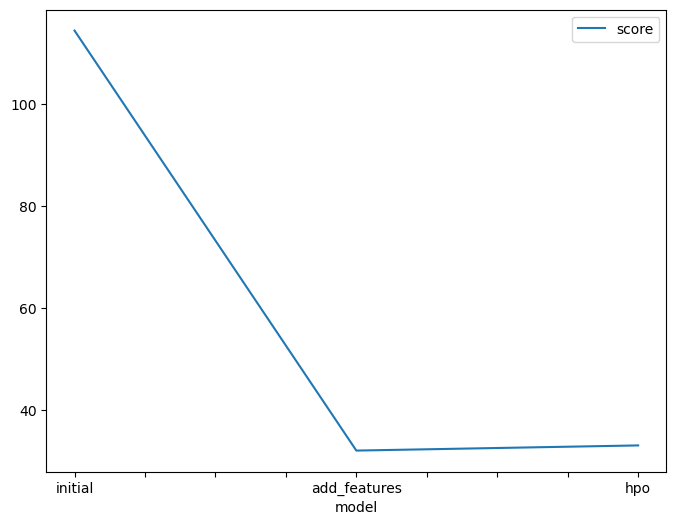

In [56]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
initial_score = predictor.leaderboard(silent=True).iloc[0]["score_val"] * -1
add_features_score = predictor_new_features.leaderboard(silent=True).iloc[0]["score_val"] * -1
hpo_score = predictor_new_hpo.leaderboard(silent=True).iloc[0]["score_val"] * -1

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [initial_score, add_features_score, hpo_score]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('./img/model_train_score.png')

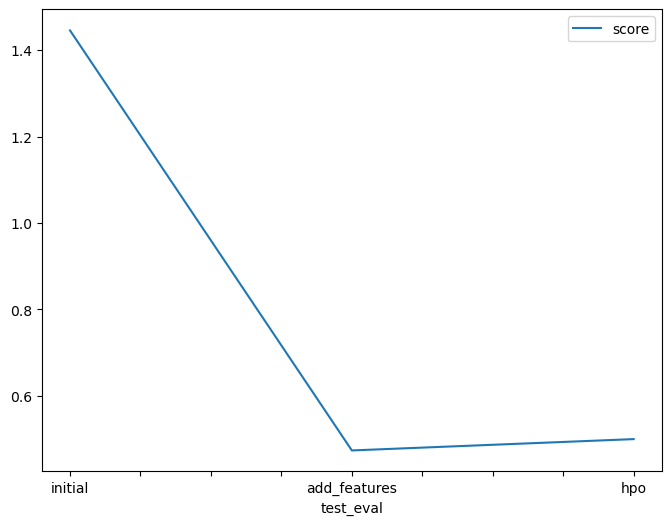

In [57]:
# Take the 3 kaggle scores and creating a line plot to show improvement
initial_test_score = 1.4457
add_features_test_score = 0.4738
hpo_test_score = 0.50
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [initial_test_score, add_features_test_score, hpo_test_score]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('./img/model_test_score.png')

### Hyperparameter table

In [58]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "NN": ['default', 'default', nn_hps],
    "GBM": ['default', 'default', gbm_hps],
    "CATB": ['default', 'default', cat_hps],
    "XGB": ['default', 'default', xgb_hps],
    "RF": ['default', 'default', rf_hps],
    "score": [initial_test_score, add_features_test_score, hpo_test_score]
})

,model,NN,GBM,CATB,XGB,RF,score
0,initial,default,default,default,default,default,1.4457
1,add_features,default,default,default,default,default,0.4738
2,hpo,"{'num_layers': Int: lower=1, upper=4, 'hidden_...","{'num_boost_round': 100, 'num_leaves': Int: lo...","{'depth': Int: lower=4, upper=8, 'learning_rat...","{'max_depth': Int: lower=3, upper=10, 'learnin...","{'n_estimators': Int: lower=100, upper=300, 'm...",0.5000


## Step 8: Suggestions Section

### Step8.1: Feature Engineering